#### Importing the libraries for the Project.

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
all_data = pd.read_csv('../Dataset_Python/googleplaystore.csv')
all_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### Checking the number of records uploaded.

In [3]:
all_data.shape

(10841, 13)

#### Checking the number of not null values in each column.

In [4]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Checking the number of null values in each column.

In [5]:
all_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#### Deleting the null values.

In [6]:
all_data=all_data.dropna(how='any',axis=0)
clean_data = pd.DataFrame(data=all_data)
clean_data.shape

(9360, 13)

#### Checking any null vales are still left.

In [7]:
clean_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

#### Finding the unique values in the 'Size' column.

In [8]:
clean_data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

#### Checking the number of invalid data in the 'Size' column.

In [9]:
clean_data[clean_data['Size']=='Varies with device']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


#### Deleting the invalid data from 'Size' column. Invalid Data means the rows with value 'Varies with Device' in the 'Size' column.

In [10]:
rows=clean_data[clean_data['Size']=='Varies with device'].index
clean_data.drop(rows,inplace=True)
clean_data.shape

(7723, 13)

#### Converting all the values in 'Size' column to KB and removing the character M or K from the end of it. Also conveting the values in the 'Size' column to float.

In [11]:
clean_data['Size']= clean_data['Size'].apply(lambda x: float(x[:-1])*1000 if x[-1]=='M' else float(x[:-1]))
clean_data['Size'] = clean_data['Size'].astype(float)

#### Checking the data after the conversion.

In [12]:
clean_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### Renaming the column 'Size' to 'Size_in_KB'.

In [13]:
clean_data.rename(columns = {'Size':'Size_in_KB'}, inplace = True) 

In [14]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7723 non-null   object 
 1   Category        7723 non-null   object 
 2   Rating          7723 non-null   float64
 3   Reviews         7723 non-null   object 
 4   Size_in_KB      7723 non-null   float64
 5   Installs        7723 non-null   object 
 6   Type            7723 non-null   object 
 7   Price           7723 non-null   object 
 8   Content Rating  7723 non-null   object 
 9   Genres          7723 non-null   object 
 10  Last Updated    7723 non-null   object 
 11  Current Ver     7723 non-null   object 
 12  Android Ver     7723 non-null   object 
dtypes: float64(2), object(11)
memory usage: 844.7+ KB


#### 'Reviews' is a numeric field but in the dataframe it is defined as String. Changing the data type of the 'Reviews' column to integer.

In [15]:
clean_data['Reviews'] = pd.to_numeric(clean_data['Reviews'])

In [16]:
clean_data.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size_in_KB        float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### Replacing the '+' and ',' with '' in the 'Installs' column.

In [17]:
clean_data['Installs'] = (clean_data['Installs'].str.replace('+', '')).str.replace(',','')
clean_data.head()

,App,Category,Rating,Reviews,Size_in_KB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### 'Installs' is a numeric field. Changing the data type of 'Installs' column to integer. 

In [18]:
clean_data['Installs'] = pd.to_numeric(clean_data['Installs'])
clean_data.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size_in_KB        float64
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### Removing the '$' sign from the values in the 'Price' column. 

In [19]:
clean_data["Price"]=clean_data["Price"].apply(lambda x:x.replace("$",""))
clean_data["Price"]=clean_data["Price"].astype(float)
clean_data.head()

,App,Category,Rating,Reviews,Size_in_KB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### 'Price' is a numeric field. Changing the data type of the 'Price' column to float.

In [20]:
clean_data.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size_in_KB        float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### Average rating should be between 1 and 5 as only these values are allowed on the play store. Dropping the rows more than 5 rating. 

In [21]:
clean_data=clean_data.loc[clean_data['Rating'] <= 5.0 ]
clean_data.shape

(7723, 13)

#### There are no records with more than 5 rating hence no need to drop any rows.

#### For an App the number of 'Reviews' should not be more than 'Installs' as only those who installed can review the app. Finding the records where 'Reviews' is greater than 'Installs'.

In [22]:
len(clean_data.loc[clean_data['Reviews']>clean_data['Installs']])

6

#### Dropping the records where the number of 'Reviews' is greater than 'Installs'.

In [23]:
clean_data=clean_data.loc[clean_data['Installs']>=clean_data['Reviews']]
clean_data.shape

(7717, 13)

#### For free apps (type = “Free”), the price should not be >0. Dropping the rows with such data.

In [24]:
clean_data = clean_data[((clean_data.Type == "Free") & (clean_data['Price'] == 0))|((clean_data.Type != "Free") & (clean_data['Price'] != 0))]
clean_data.shape

(7717, 13)

#### Univariate Analysis

#### Box Plot for 'Price'

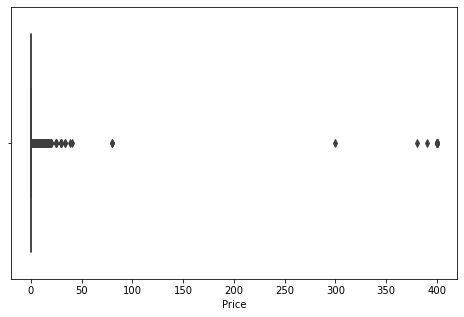

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(x=clean_data['Price'])
plt.show()

#### From the above boxplot, the box of data is not very clear. So plotting for paid Apps only ( 'Type' not equal to 'Free').

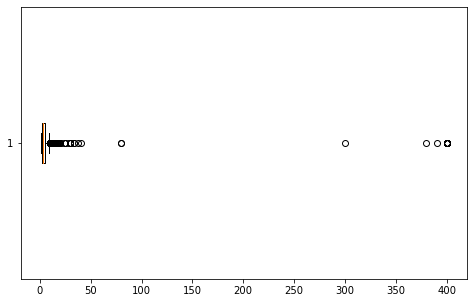

In [26]:
plt.figure(figsize=(8,5))
plt.boxplot(clean_data[clean_data.Type!='Free'].Price,vert=False)
plt.show()

#### Observation - From the BoxPlot we can see that the Prices above 200$ are definitely outliers.

#### Boxplot for 'Reviews'.

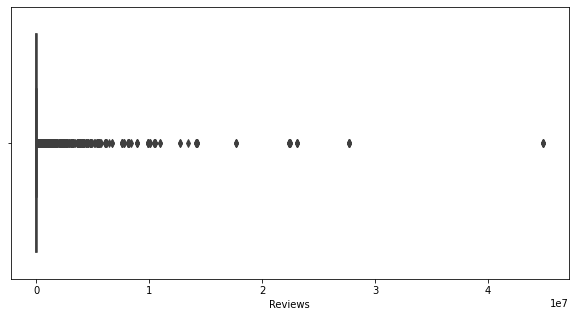

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(x=clean_data["Reviews"])
plt.show()

#### Observation - From the above plot we can see that there are apps with very high 'Reviews' (more than 2 millions).  The records with more than 2 million 'Reviews' are definitely outliers.

#### Histogram for 'Rating'.

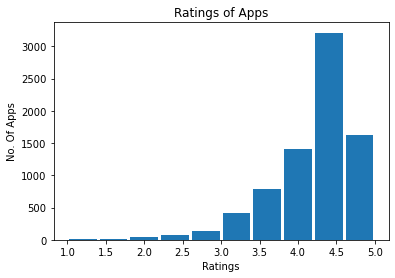

In [28]:
clean_data['Rating'].plot.hist(bins=10,rwidth=0.9)
plt.title('Ratings of Apps')
plt.ylabel('No. Of Apps')
plt.xlabel('Ratings')
plt.show()

#### Observation - Most of the Apps are having rating between 4.0 and 5.0. The ratings of the Apps are mostly on the higher side.

#### Histogram for 'Size'

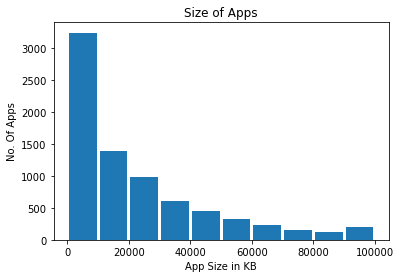

In [29]:
clean_data['Size_in_KB'].plot.hist(bins=10,rwidth=0.9)
plt.title('Size of Apps')
plt.ylabel('No. Of Apps')
plt.xlabel('App Size in KB')
plt.show()

#### Observation - Most of the Apps are having less size. Most records are between 0 and 10,000 KB. There are also some Apps with very heavy size.

#### Outlier Treatment

#### From the box plot, it seems like there are some apps with very high price. A price of $200 for an App on the Play Store is very high. Finding the number of records with very high Price(>200).

In [30]:
high_price=clean_data[clean_data['Price']>200]
high_price

,App,Category,Rating,Reviews,Size_in_KB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


#### Dropping the rows with price greater than 200 as most of them seems to be outliers.

In [31]:
clean_data.drop(high_price.index,inplace=True)
clean_data.shape

(7702, 13)

#### Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Dropping the records having more than 2 million reviews.

In [32]:
clean_data = clean_data[clean_data['Reviews']<=2000000]
clean_data.shape

(7483, 13)

In [33]:
#clean_data.sort_values(by=['Installs'], inplace=True)
#clean_data

#### There seems to be some outliers in 'Installs' field too. Apps having very high number of installs should be dropped from the analysis as they may skew the result. Finding the percentile(10,25,50,70,90,99) values for 'Installs' field. 

In [34]:
perc = [.10, .25, .50, .70, .90, .95, .99]
clean_data['Installs'].describe(percentiles = perc)

count    7.483000e+03
mean     3.947465e+06
std      2.781831e+07
min      5.000000e+00
10%      1.000000e+03
25%      1.000000e+04
50%      1.000000e+05
70%      1.000000e+06
90%      1.000000e+07
95%      1.000000e+07
99%      5.000000e+07
max      1.000000e+09
Name: Installs, dtype: float64

#### Observation - From the above percentile values for 'Installs' field we can say that 99% data is below 50000000 so we can drop the records which are having 'Installs' greater than 50000000.

#### Dropping the records with 'Installs' greater than 50000000.

In [35]:
clean_data = clean_data[clean_data['Installs']<=50000000]
clean_data.shape

(7423, 13)

#### Bivariate Analysis

#### Scatter plot/joinplot for Rating vs. Price

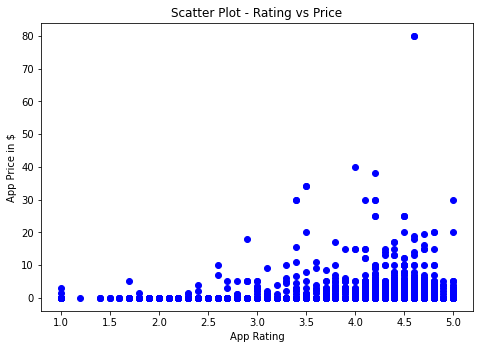

In [36]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(clean_data['Rating'], clean_data['Price'], color='b')
ax.set_xlabel('App Rating')
ax.set_ylabel('App Price in $')
ax.set_title('Scatter Plot - Rating vs Price')
plt.show()

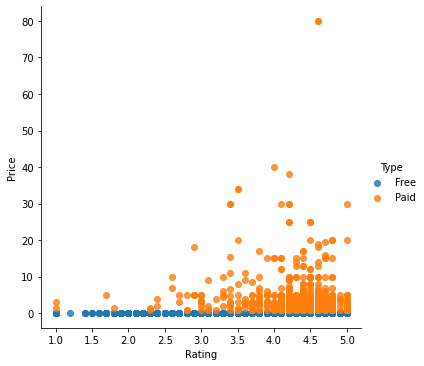

In [37]:
sns.lmplot(x='Rating',y='Price',hue='Type',data=clean_data,fit_reg=False)

#### Observation - From the above two plots, it is clear that there is no specific relationship between Price and Rating. Most of the Paid Apps are having high Rating.

#### Scatter plot/joinplot for Rating vs. Size_in_KB

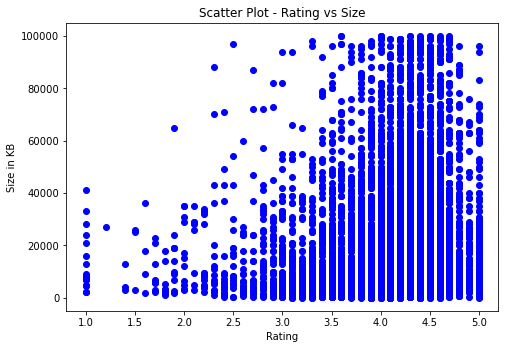

In [38]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(clean_data['Rating'], clean_data['Size_in_KB'], color='b')
ax.set_xlabel('Rating')
ax.set_ylabel('Size in KB')
ax.set_title('Scatter Plot - Rating vs Size')
plt.show()

#### Observation - From the above plot it is clear that the heavier apps are always having high Rating.

#### Scatter plot/joinplot for Rating vs. Reviews

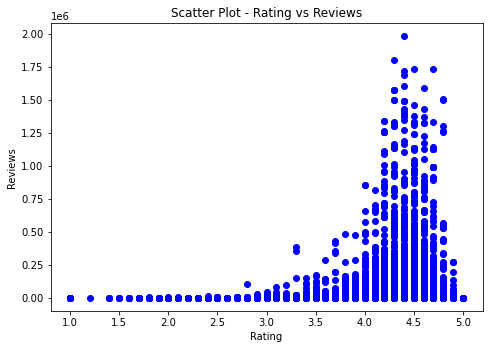

In [39]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(clean_data['Rating'], clean_data['Reviews'], color='b')
ax.set_xlabel('Rating')
ax.set_ylabel('Reviews')
ax.set_title('Scatter Plot - Rating vs Reviews')
plt.show()

#### Observation - From the above plot it is clear that high rated Apps are having more reviews.

#### Boxplot for Rating vs. Content Rating

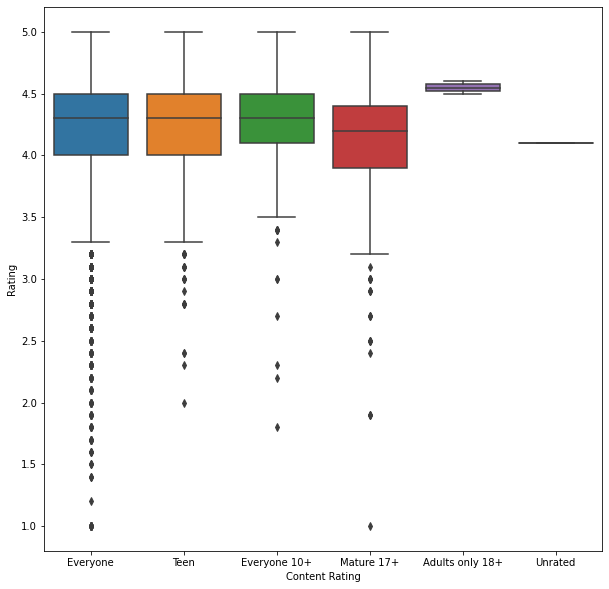

In [40]:
plt.figure(figsize=(10,10))
sns.boxplot(x=clean_data["Content Rating"],y=clean_data["Rating"])
plt.show()

#### Observation - From the above plot, we can say that the median of most of the Apps are similar except for 'Adult only 18+'. It is little higher than the other ones.

#### Boxplot for Ratings vs. Category

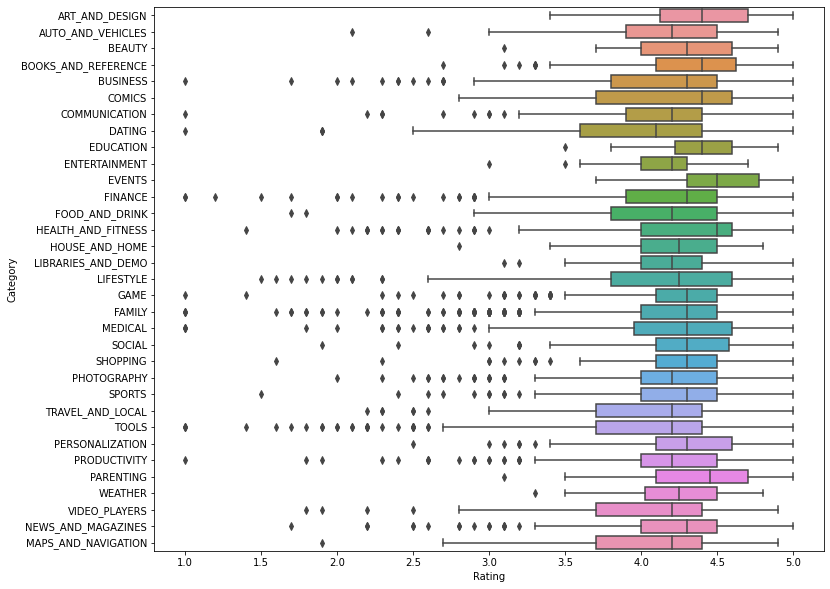

In [41]:
plt.figure(figsize=(12,10))
sns.boxplot(x=clean_data["Rating"],y=clean_data["Category"])
plt.show()

#### Observation - The Categories like 'Health and Fitness' and 'Events' are seems to have higher median than the other categories of Apps. 

#### Data preprocessing

#### Making a copy of the dataframe for Data Processing

In [42]:
clean_data.shape

(7423, 13)

In [43]:
inp1 = pd.DataFrame(data=clean_data)
inp1.shape

(7423, 13)

#### Reviews and Install have some values that are still relatively very high. Before building a linear regression model, we need to reduce the skew. Applying log transformation to Reviews and Installs.

In [44]:
inp1.head()

,App,Category,Rating,Reviews,Size_in_KB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [45]:
inp1['Reviews'] = np.log1p(inp1['Reviews'])
inp1['Installs'] = np.log1p(inp1['Installs'])
inp1.head()

,App,Category,Rating,Reviews,Size_in_KB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281389,25000.0,17.727534,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### Dropping columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [46]:
inp1.drop(['App', 'Last Updated','Current Ver', 'Android Ver' ], axis='columns', inplace=True)
inp1.head()

,Category,Rating,Reviews,Size_in_KB,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,12.281389,25000.0,17.727534,Free,0.0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity


#### Creating dummy columns for columns 'Category', 'Genres' and 'Content Rating'

In [47]:
inp2 = pd.get_dummies(inp1, columns = ['Category','Genres', 'Content Rating'])
inp2.head()

,Rating,Reviews,Size_in_KB,Installs,Type,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,19000.0,9.210440,Free,0.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,Free,0.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,Free,0.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4.5,12.281389,25000.0,17.727534,Free,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4.3,6.875232,2800.0,11.512935,Free,0.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#### Splitting the data into train and test and applying 70-30 split.

In [48]:
inp2.shape

(7423, 157)

In [49]:
df_train,df_test=train_test_split(inp2,test_size=.30,random_state=2020)

In [50]:
df_train.shape

(5196, 157)

In [51]:
df_test.shape

(2227, 157)

#### Splitting the dataframes for dependent and independent variable into X_train, y_train, X_test, and y_test.

In [52]:
inp2=pd.get_dummies(inp1,drop_first=True)
x=inp2.iloc[:,1:]
y=inp2.iloc[:,:1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=2020)

#### Model building using linear regression technique.

In [53]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
model=regressor.fit(X_train, y_train)

#### Predicting the data for test dataframe.

In [54]:
y_pred=regressor.predict(X_test)
y_pred

array([[4.12218941],
       [3.99331844],
       [4.63281193],
       ...,
       [4.54345777],
       [4.08503682],
       [3.95948807]])

#### Comparison between the actual and the predicted value of the App Rating

In [55]:
y_test=np.array(y_test)
y_pred=np.array(y_pred)
df_compare=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
df_compare.head(20)

,Actual,Predicted
0,4.3,4.122189
1,3.9,3.993318
2,4.3,4.632812
3,4.5,4.048352
4,4.4,4.400000
5,4.6,3.979563
6,4.4,4.621735
7,3.4,3.804761
8,4.0,4.242637
9,5.0,4.128803


#### Observation - From the above table we can observe that the predicted value by the model is pretty close to the actual value

#### Report the R2 on the train set

In [56]:
from statsmodels.api import OLS
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as ms

In [57]:
model_fit = OLS(y_train,X_train).fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     7.812
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          4.62e-114
Time:                        10:25:53   Log-Likelihood:                -3914.1
No. Observations:                5196   AIC:                             8070.
Df Residuals:                    5075   BIC:                             8863.
Df Model:                         120                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Reviews                                          0.1822      0.007     25.051      0.000       0.168       0.196
Size_in_KB                                    -9.07e-07   3.98e-07     -2.282      0.023   -1.69e-06   -1.28e-07
Installs                                        -0.1591      0.007    -22.181      0.000      -0.173      -0.145
Price                                           -0.0023      0.004     -0.602      0.547      -0.010       0.005
Category_AUTO_AND_VEHICLES                       2.4277      0.268      9.047      0.000       1.902       2.954
Category_BEAUTY                                  2.5829      0.271      9.547      0.000       2.053       3.113
Category_BOOKS_AND_REFERENCE                     2.5285      0.267      9.480      0.000       2.006       3.051
Category_BUSINESS                                2.4422      0.266      9.178      0.000       1.921       2.964
Category_COMICS                                  3.4941      0.390      8.964      0.000       2.730       4.258
Category_COMMUNICATION                           2.3812      0.266      8.937      0.000       1.859       2.904
Category_DATING                                  2.3180      0.267      8.680      0.000       1.795       2.842
Category_EDUCATION                               4.7046      0.543      8.664      0.000       3.640       5.769
Category_ENTERTAINMENT                           4.6664      0.544      8.574      0.000       3.599       5.733
Category_EVENTS                                  2.6283      0.270      9.746      0.000       2.100       3.157
Category_FAMILY                                  4.7048      0.538      8.743      0.000       3.650       5.760
Category_FINANCE                                 2.4339      0.266      9.147      0.000       1.912       2.956
Category_FOOD_AND_DRINK                          2.4138      0.268      9.012      0.000       1.889       2.939
Category_GAME                                    4.8469      0.532      9.103      0.000       3.803       5.891
Category_HEALTH_AND_FITNESS                      2.4678      0.266      9.268      0.000       1.946       2.990
Category_HOUSE_AND_HOME                          2.4546      0.268      9.144      0.000       1.928       2.981
Category_LIBRARIES_AND_DEMO                      2.5150      0.269      9.361      0.000       1.988       3.042
Category_LIFESTYLE                               3.1995      0.395      8.107      0.000       2.426       3.973
Category_MAPS_AND_NAVIGATION                     2.3664      0.267      8.851      0.000       1.842       2.891
Category_MEDICAL                                 2.4946      0.266      9.379      0.000       1.973       3.016
Category_NEWS_AND_MAGAZINES     

In [58]:
print('R2_Score=',r2_score(y_test,y_pred))
print('Root_Mean_Squared_Error(RMSE)=',np.sqrt(ms(y_test,y_pred)))

R2_Score= 0.13241526834064354
Root_Mean_Squared_Error(RMSE)= 0.4972361375688641


In [65]:
import statsmodels.formula.api as sm
model=sm.ols(formula='Rating~Price+Installs+Size_in_KB+Reviews',data=inp2)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     225.0
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          1.42e-182
Time:                        10:35:35   Log-Likelihood:                -5695.0
No. Observations:                7423   AIC:                         1.140e+04
Df Residuals:                    7418   BIC:                         1.143e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5854      0.028    161.497      0.000       4.530       4.641
Price         -0.0034      0.003     -1.316      0.188      -0.008       0.002
Installs      -0.1438      0.006    -25.717      0.000      -0.155      -0.133
Size_in_KB -1.865e-07   2.84e-07     -0.657      0.511   -7.43e-07     3.7e-07
Reviews        0.1646      0.006     28.905      0.000       0.153       0.176
==============================================================================
Omnibus:                     2567.400   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12052.686
Skew:                          -1.618   Prob(JB):                         0.00
Kurtosis:                       8.338   Cond. No.                     1.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""